## Breast Cancer using Tensorflow & Keras

### Import the libraries

In [26]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load dataset

In [27]:
cancer = load_breast_cancer()

In [28]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [30]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
len(cancer.feature_names)

30

In [32]:
df = pd.DataFrame(cancer.data[:, 0:2], columns=cancer.feature_names[0:2])

In [33]:
df

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [34]:
df['class'] = cancer.target

In [35]:
df

,mean radius,mean texture,class
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


In [20]:
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,1
47,13.17,18.66,0
292,12.95,16.02,1
186,18.31,18.58,0
414,15.13,29.81,0


In [38]:
# df['class'] = np.where(df['class'] == 0, 'yes', 'no')
# df['class'] = np.where(df['class'] == 0, 'malignant', 'benign')
target_map = {0: 'malignant', 1: 'benign'}
df['class'] = df['class'].map(target_map)

In [39]:
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,benign
47,13.17,18.66,malignant
292,12.95,16.02,benign
186,18.31,18.58,malignant
414,15.13,29.81,malignant


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean radius   569 non-null    float64
 1   mean texture  569 non-null    float64
 2   class         569 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


In [41]:
df.isnull().sum()

mean radius     0
mean texture    0
class           0
dtype: int64

### Data Exploration

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

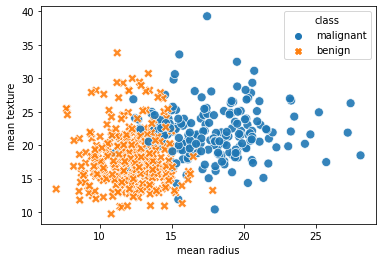

In [44]:
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class', alpha=0.9, edgecolor='w', s=80)

### Label Encoding

In [45]:
class_names,y = np.unique(df['class'], return_inverse=True)

In [46]:
class_names

array(['benign', 'malignant'], dtype=object)

In [47]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [49]:
y[40:50]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [50]:
X = df.drop('class', axis=1)

In [51]:
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


### Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()

In [55]:
X_sc = sc.fit_transform(X)

In [56]:
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

### Visualization after scailed

<AxesSubplot:title={'center':'Before StandardScale (Raw data)'}, xlabel='mean radius', ylabel='Density'>

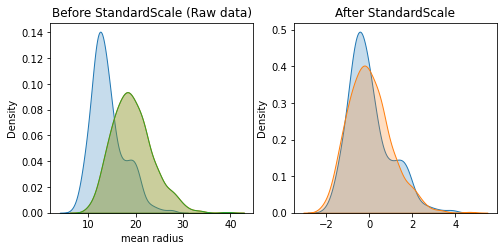

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))
ax1.set_title('Before StandardScale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After StandardScale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

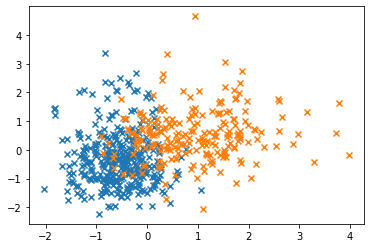

In [61]:
plt.scatter(X_sc[:, 0][y==0], X_sc[:, 1][y==0], marker='x')
plt.scatter(X_sc[:, 0][y==1], X_sc[:, 1][y==1], marker='x')

### Turn dataset into training set & test set

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

In [64]:
X_train.shape, X_test.shape

((426, 2), (143, 2))

In [65]:
y_train.shape, y_test.shape

((426,), (143,))

In [66]:
X_train[:5]

array([[ 0.31034466,  2.63664885],
       [ 0.23650097, -0.04413248],
       [ 0.15697699,  0.19555543],
       [-1.0813249 , -0.68407594],
       [-0.64678318, -0.42577149]])

In [67]:
y_train[:5]

array([1, 0, 1, 0, 0], dtype=int64)

### training data

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### create

In [69]:
model = Sequential()

In [70]:
model.add(Dense(units=32, activation='relu', input_shape=(2,)))

In [71]:
model.add(Dense(units=1, activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initia

In [74]:
model.output_shape

(None, 1)

#### Compile

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Trainig ANN 

In [76]:
import time
start = time.time()
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=32, validation_split=0.25)
end = time.time()
print('Time Taken: {:.3f} secs'.format(end-start))

Epoch 1/20
10/10 [==============================] - 1s 41ms/step - loss: 0.7056 - accuracy: 0.6395 - val_loss: 0.6963 - val_accuracy: 0.6075
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.6395 - val_loss: 0.6528 - val_accuracy: 0.6075
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.6426 - val_loss: 0.6141 - val_accuracy: 0.6075
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.6803 - val_loss: 0.5792 - val_accuracy: 0.7103
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5458 - accuracy: 0.8088 - val_loss: 0.5483 - val_accuracy: 0.8131
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.8652 - val_loss: 0.5197 - val_accuracy: 0.8131
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.4880 - accuracy: 0.8903 - val_loss: 0.4938 - val_accuracy: 0.8131
Epoch 8/20
10/10 [=